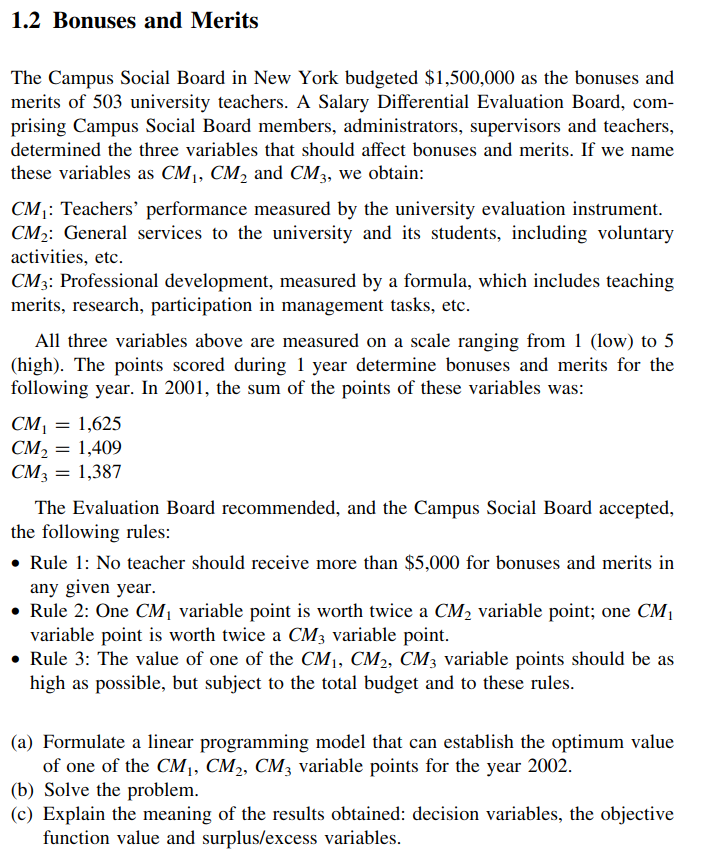

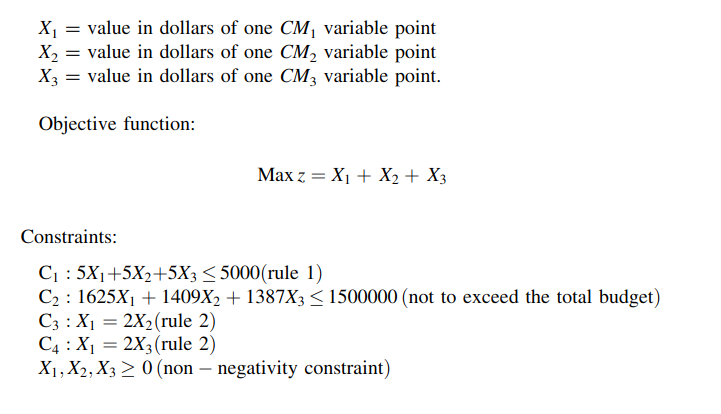

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [3]:
#Defining the model

model = pyo.ConcreteModel()

In [4]:
#Decision variables

model.x1=pyo.Var(within=pyo.NonNegativeReals)
x1=model.x1

model.x2=pyo.Var(within=pyo.NonNegativeReals)
x2=model.x2

model.x3=pyo.Var(within=pyo.NonNegativeReals)
x3=model.x3

In [5]:
#Objective rule and constraints

model.Obj = pyo.Objective(expr=x1+x2+x3, sense = pyo.maximize)
model.Const1 = pyo.Constraint(expr=5*x1+5*x2+5*x3<=5000)
model.Const2 = pyo.Constraint(expr=1625*x1+1409*x2+1387*x3<=1500000)
model.Const3 = pyo.Constraint(expr=x1==2*x2)
model.Const4 = pyo.Constraint(expr=x1==2*x3)

In [6]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [7]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 992.391663910023
  Upper bound: 992.391663910023
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 10
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.006459712982177734
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [8]:
print("objective function: ", model.Obj())
print(x1())
print(x2())
print(x3())

objective function:  992.391663910024
496.195831955012
248.097915977506
248.097915977506
